In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as mc
import statsmodels.stats.api as sms
from statsmodels.formula.api import glm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Read files
data_hour = pd.read_csv('../data/hour.csv', sep=',')
data_day = pd.read_csv('../data/day.csv', sep=',')
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Check for NaN
data_hour.loc[np.isnan(data_hour['temp']) == True].head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [4]:
# assign independent variables, dependent variable, respectively
x = pd.DataFrame(data_hour[['temp','season']])
# define the target
y = pd.DataFrame(data_hour['cnt'])

In [5]:
# Create training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=42)

In [6]:
# # Fit Ordinary Least Squares model
# X_train = sm.add_constant(X_train)
# model = sm.OLS(y_train, X_train).fit()
# model.summary()

In [7]:
sk_model = LinearRegression()

In [8]:
sk_model.fit(X_train, y_train)

LinearRegression()

In [9]:
print('Model Coefficients:', sk_model.coef_)
print()
print('Intercept:', sk_model.intercept_)
coef = pd.DataFrame(sk_model.coef_.T, columns=['Coefficients'])
cols = pd.DataFrame(x.columns, columns=['Columns'])
joined = pd.concat([cols['Columns'], coef['Coefficients']], axis=1)
joined 

Model Coefficients: [[362.56385034  10.74230326]]

Intercept: [-16.30777318]


,Columns,Coefficients
0,temp,362.563850
1,season,10.742303


In [10]:
predictions = sk_model.predict(X_test)
pd.DataFrame(predictions, columns=['Predictions'])

,Predictions
0,305.970217
1,81.449854
2,142.681872
3,287.976637
4,88.701131
...,...
5209,302.479191
5210,142.951096
5211,305.970217
5212,215.194642


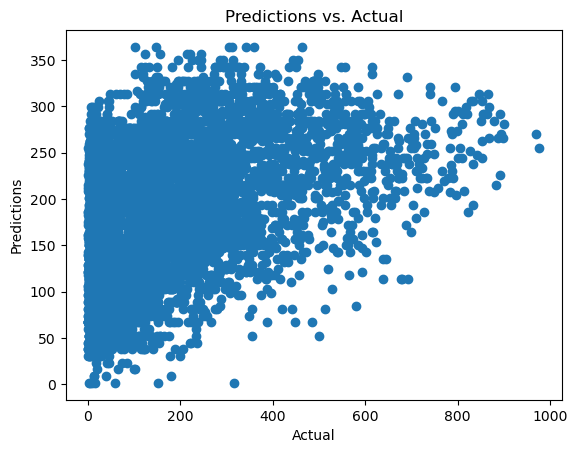

In [11]:
plt.scatter(y_test, predictions)
plt.title('Predictions vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()